In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex         Age       SibSp       Parch  Ticket        Fare Cabin Embarked
count    891.000000  891.000000  891.000000                      891   891  714.000000  891.0

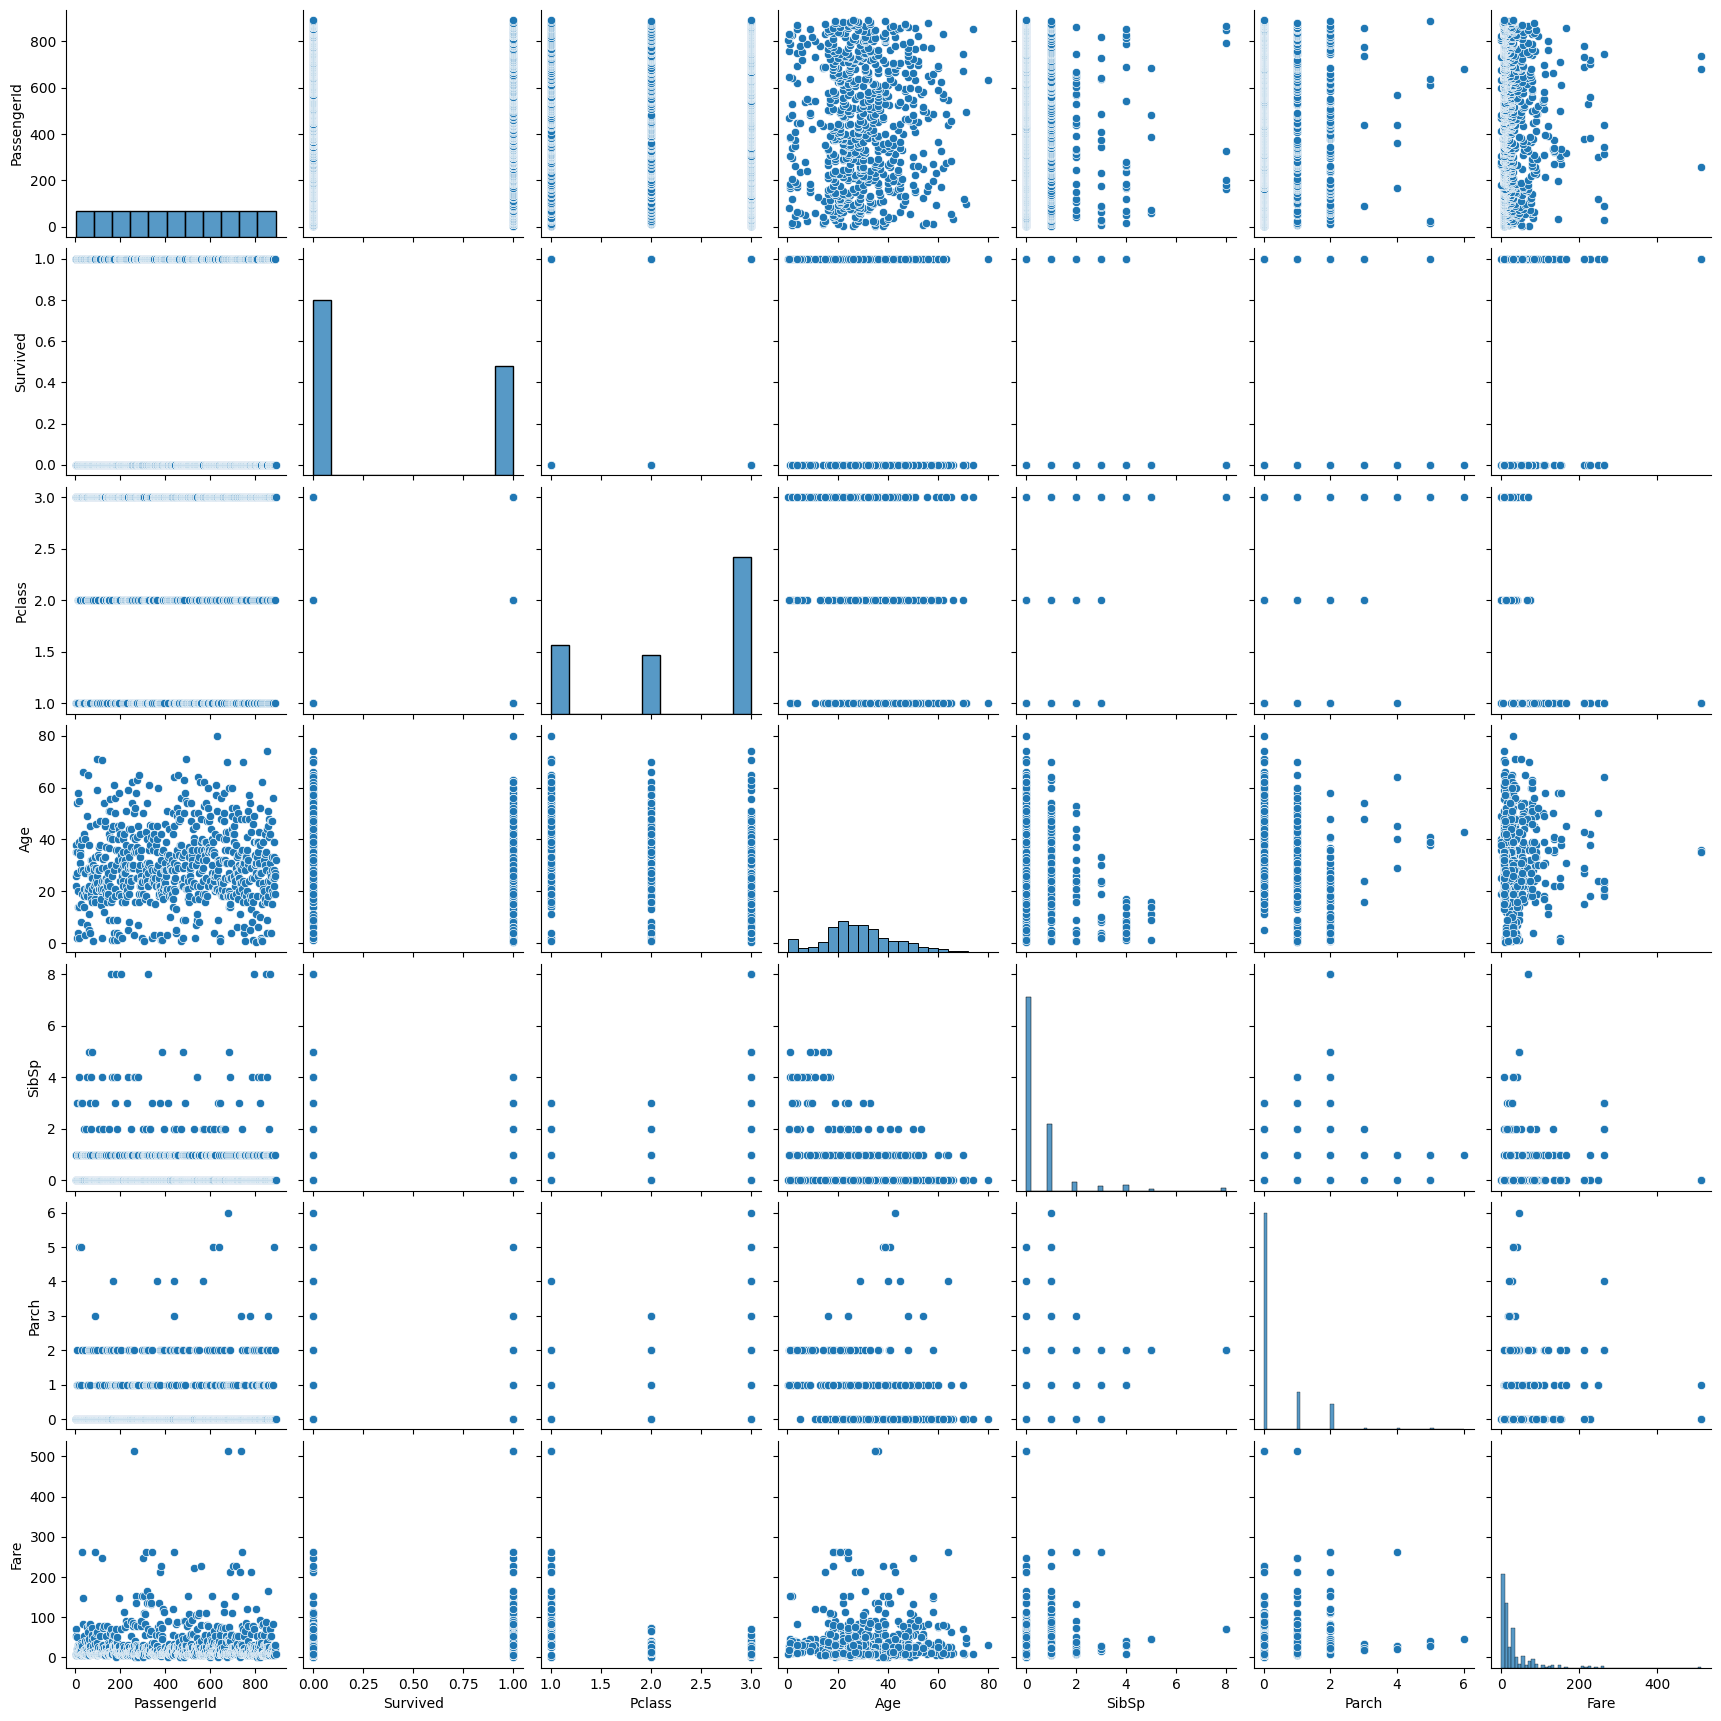

In [3]:
# doc du lieu
df = pd.read_excel('titanic.xlsx')
print(df.info()) # hien thi thong tin cua du lieu: kieu du lieu, co cotj nao thieu du lieu hay khong
print(df.describe(include='all')) # tinh cac gia tri nhu trung binh, max, min, tu phan vi,....
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(num_df)
plt.show()

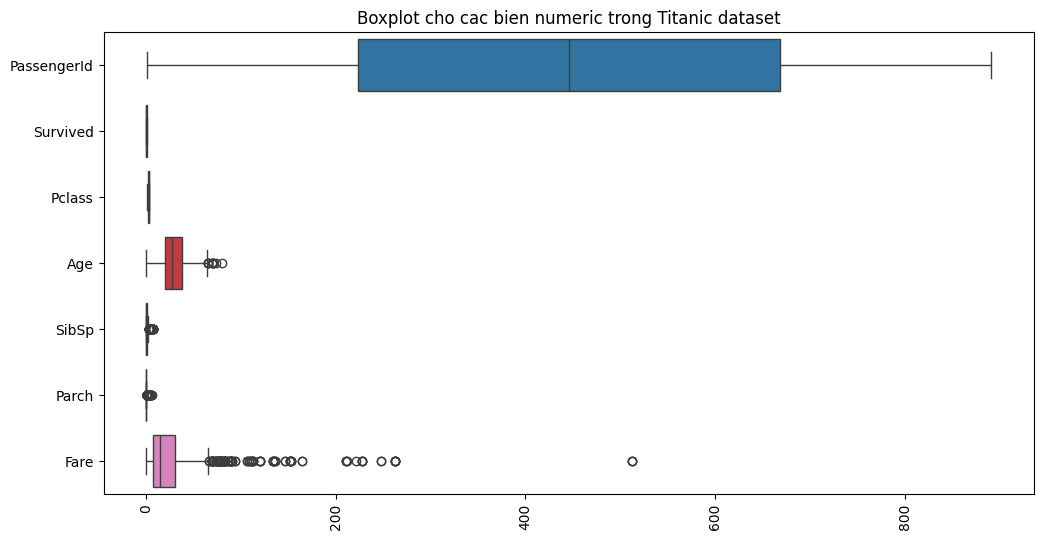

In [4]:
# kiem tra va xu ly du lieu

plt.figure(figsize=(12, 6)) # tạo figure mới, kích thước 12x6 inch
sns.boxplot(data=df, orient="h") # vẽ boxplot ngang cho tất cả numeric columns
plt.xticks(rotation=90) # xoay nhãn trục X cho dễ đọc nếu quá nhiều cột
plt.title("Boxplot cho cac bien numeric trong Titanic dataset")
plt.show()

In [5]:
# chuan hoa du lieu
y = df['Survived']  
X_num = df.select_dtypes(include=['int64', 'float64']).copy()

if 'Survived' in X_num.columns:
    X_num = X_num.drop(columns=['Survived'])

scaler = MinMaxScaler()
X_num_norm = scaler.fit_transform(X_num)

df_norm = pd.DataFrame(X_num_norm, columns=X_num.columns)
df_norm['Survived'] = y.reset_index(drop=True)

print("Da luu vao file Titanic_cleaned.xlsx")

Da luu vao file Titanic_cleaned.xlsx


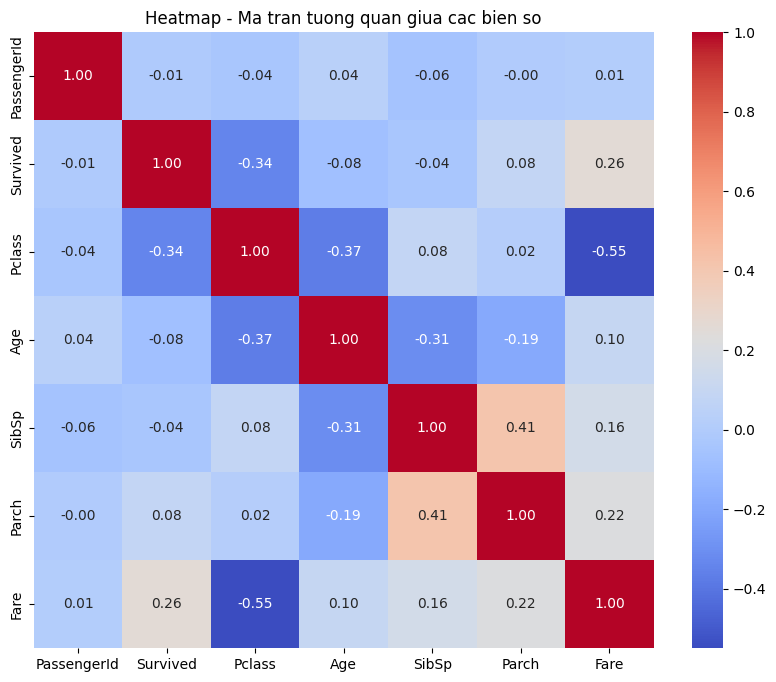

In [6]:
# Khám phá độ tương quan bằng heatmap
corr_matrix = df.select_dtypes(include=['int64','float64']).corr() # Lấy riêng cột numeric để tính tương quan

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap - Ma tran tuong quan giua cac bien so")
plt.show()

In [7]:
# chia du lieu train/test
X = df_norm.drop('Survived', axis=1)
y = df_norm['Survived']

# Chia du lieu train/test (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y)
print("Missing values in train:", X_train.isnull().sum().sum())
print("Missing values in test :", X_test.isnull().sum().sum())


Missing values in train: 107
Missing values in test : 70


In [8]:

# Khoi tao bo Imputer (thay NaN bang trung vi cho so, mode cho phan loai)
imputer = SimpleImputer(strategy='median')  

# Fit tren train va transform tren ca train + test de tranh leak du lieu
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print("Missing values in train:", X_train.isnull().sum().sum())
print("Missing values in test :", X_test.isnull().sum().sum())


Missing values in train: 0
Missing values in test : 0


In [9]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("\tLogistic Regression")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))


	Logistic Regression
Accuracy : 0.7058823529411765
Precision: 0.6777777777777778
Recall   : 0.44525547445255476


In [10]:
# SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

print("\tSupport Vector Machine")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))


	Support Vector Machine
Accuracy : 0.7086834733893558
Precision: 0.6813186813186813
Recall   : 0.45255474452554745


In [11]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

print("\tNaive Bayes")
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall   :", recall_score(y_test, y_pred_nb))


	Naive Bayes
Accuracy : 0.6862745098039216
Precision: 0.6373626373626373
Recall   : 0.4233576642335766


In [12]:
# So sanh ket qua cac model
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nb),
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_nb),
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_nb),
    ]
})

print("\tSo sánh các model")
display(results)


	So sánh các model


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.705882,0.677778,0.445255
1,SVM,0.708683,0.681319,0.452555
2,Naive Bayes,0.686275,0.637363,0.423358
